In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import os, snap
import pandas as pd
import itertools
import numpy as np
import sys
import itertools

from dateutil.parser import parse as dt_parse
from matplotlib import pyplot as plt
from src.DataReader import DataReader
from src.constants import SPLIT_TIME, STORE_LOCATION, DATA_ROOT, POSTS_FILE, VOTES_FILE

In [ ]:
%matplotlib inline

In [4]:
data_directory = DATA_ROOT

In [5]:
post_reader = DataReader(os.path.join(data_directory, POSTS_FILE), True)
post_reader.read_data()

Reading file...
Converting...
Progress | ██████████ | 100% || Estimated time remaining: 0.0 seconds
Conversion complete...
Forming data frame...


In [6]:
pdf = post_reader._df

In [7]:
pdf_train = pdf[pdf.CreationDate <= dt_parse(SPLIT_TIME)]

In [8]:
users_pdf = pdf_train[(pdf_train.OwnerUserId.notnull()) & (pdf_train.PostTypeId==2) ]

In [37]:
users_pdf.OwnerUserId.unique().shape

(31834,)

In [9]:
graph = snap.TUNGraph.New()

In [10]:
answer_groups = users_pdf.groupby(['ParentId'])

In [50]:
for nm, grp in answer_groups:
    users = grp.OwnerUserId
    users = users[users.notnull()].astype(int)
    
    edge_pairs = itertools.combinations(users, 2)
    
    if len(users) == 1:
        edge_pairs = [[users.iloc[0], users.iloc[0]]]
#         print users
#         print edge_pairs
#         break
    
    for u in users:
        if not graph.IsNode(u):
            graph.AddNode(u)
        
    for ed in edge_pairs:
        graph.AddEdge(ed[0], ed[1])
    
#     break

In [51]:
print graph.GetEdges()
print graph.GetNodes()

335739
31834


In [52]:
DegToCntV = snap.TIntPrV()
snap.GetDegCnt(graph, DegToCntV)

deg_hist = {}
for item in DegToCntV:
    deg_hist[item.GetVal1()] = item.GetVal2()

x, y = zip(*deg_hist.items())

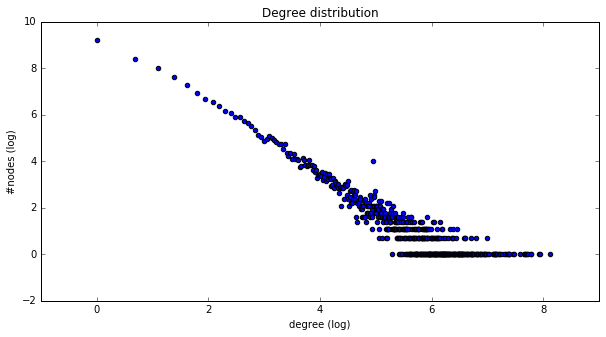

In [53]:
plt.figure(figsize=(10,5))
# ax = plt.subplot()

plt.scatter(np.log(x), np.log(y))

# plt.gca().set_yscale('log')
# plt.gca().set_xscale('log')

# ax.set_xscale('log')
# ax.set_yscale('log')

plt.xlabel('degree (log)')
plt.ylabel('#nodes (log)')
plt.title('Degree distribution')

plt.show()

In [54]:
snap.SaveEdgeList(graph, 'data_created/graphs/user-user.txt', 'User-user graph created using posts')

In [55]:
lg = snap.LoadEdgeList(snap.PUNGraph, 'data_created/graphs/user-user.txt', 0, 1)

In [56]:
lg.GetNodes()

31834

In [57]:
with open('data_created/graphs/user-user.txt', 'r') as fl:
    lines = fl.readlines()

In [58]:
lines = filter(lambda x: '#' not in x, lines)

In [59]:
lines = map(lambda x: x.strip().split(), lines)

In [60]:
len(set(itertools.chain.from_iterable(lines)))

31834